<a href="https://colab.research.google.com/github/b-richins92/Cancer_Prediction/blob/main/New_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.

In [3]:
import pycaret
pycaret.__version__

'3.3.2'

In [4]:

import pandas as pd
import numpy as np
#from pycaret.util import version

In [5]:
import os
import requests
from zipfile import ZipFile
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [7]:
data = pd.read_csv('clean_df (2).csv')
data.columns

Index(['Gender', 'Age Group', 'Num of Bad Mental Health Days',
       'Could Afford Doctor', 'Years Since Last Checkup',
       'Exercise in Past 30 Days', 'Hours of Sleeping', 'Heart Attack',
       'Heart Disease', 'Stroke', 'Asthma', 'Cancer', 'Depression',
       'Kidney Disease', 'Arthritis', 'Diabetes', 'Married', 'Deaf', 'Blind',
       'Smoked 100', 'Smokeless Tobacco', 'Age Started Smoking',
       'Cigarettes per Day', 'Days Drinking', 'Flu Vaccine',
       'Pneumonia Vaccine', 'Tetanus Last 10 Years', 'Had COVID',
       'Metropolitan', 'Insulin', 'BMI',
       'Ethnicity_American Indian and Alaskan Native',
       'Ethnicity_Asian and Pacific Islander', 'Ethnicity_Black',
       'Ethnicity_Hispanic', 'Ethnicity_Multiracial, non-Hispanic',
       'Ethnicity_White', 'Education_attended_college',
       'Education_did_not_graduate_high_school', 'Education_graduated_college',
       'Education_graduated_high_school'],
      dtype='object')

In [8]:
data.isnull().sum()/len(data) * 100

Gender                                           0.000000
Age Group                                        2.139711
Num of Bad Mental Health Days                    2.181709
Could Afford Doctor                              0.346747
Years Since Last Checkup                         1.785426
Exercise in Past 30 Days                         0.206756
Hours of Sleeping                                1.149004
Heart Attack                                     0.681649
Heart Disease                                    0.898097
Stroke                                           0.276752
Asthma                                           0.314442
Cancer                                           0.001077
Depression                                       0.547042
Kidney Disease                                   0.330595
Arthritis                                        0.465201
Diabetes                                         0.189527
Married                                          1.174849
Deaf          

In [9]:
data = data.dropna()

In [10]:
data.head()

,Gender,Age Group,Num of Bad Mental Health Days,Could Afford Doctor,Years Since Last Checkup,Exercise in Past 30 Days,Hours of Sleeping,Heart Attack,Heart Disease,Stroke,...,Ethnicity_American Indian and Alaskan Native,Ethnicity_Asian and Pacific Islander,Ethnicity_Black,Ethnicity_Hispanic,"Ethnicity_Multiracial, non-Hispanic",Ethnicity_White,Education_attended_college,Education_did_not_graduate_high_school,Education_graduated_college,Education_graduated_high_school
4,0,5.0,0.0,0.0,1.0,1.0,9.0,0.0,0.0,0.0,...,False,False,False,False,False,True,True,False,False,False
6,0,13.0,0.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,True,False
7,0,13.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,True
11,0,13.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
12,1,8.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True


In [11]:
from pycaret.classification import *
s = setup(data, target= 'Cancer', session_id = 123, train_size=0.8, fix_imbalance=True)

,Description,Value
0,Session id,123
1,Target,Cancer
2,Target type,Binary
3,Original data shape,"(49182, 41)"
4,Transformed data shape,"(79129, 41)"
5,Transformed train set shape,"(69292, 41)"
6,Transformed test set shape,"(9837, 41)"
7,Numeric features,30
8,Categorical features,10
9,Preprocess,True


In [12]:
best = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5651,0.7095,0.7610,0.1828,0.2947,0.1265,0.1943,0.9800
lda,Linear Discriminant Analysis,0.6601,0.7625,0.7489,0.2240,0.3448,0.1972,0.2629,1.0950
ridge,Ridge Classifier,0.6601,0.7625,0.7487,0.2239,0.3447,0.1971,0.2627,1.0000
qda,Quadratic Discriminant Analysis,0.5569,0.6992,0.7453,0.1774,0.2866,0.1161,0.1795,1.1950
lr,Logistic Regression,0.6696,0.7614,0.7317,0.2265,0.3459,0.2000,0.2617,8.4720
svm,SVM - Linear Kernel,0.6403,0.7464,0.7142,0.2166,0.3262,0.1760,0.2360,4.2730
knn,K Neighbors Classifier,0.6314,0.6535,0.5923,0.1811,0.2774,0.1156,0.1522,4.2430
dt,Decision Tree Classifier,0.7960,0.5571,0.2432,0.2035,0.2215,0.1052,0.1058,1.6750
ada,Ada Boost Classifier,0.8544,0.7473,0.1502,0.2960,0.1961,0.1260,0.1359,5.8910
gbc,Gradient Boosting Classifier,0.8757,0.7539,0.0475,0.3495,0.0834,0.0565,0.0909,22.6140


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [13]:
print(best)

GaussianNB(priors=None, var_smoothing=1e-09)


In [14]:
best = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8793,0.7282,0.0277,0.4194,0.0519,0.0377,0.0824
1,0.8775,0.7364,0.0191,0.3000,0.0360,0.0220,0.0488
2,0.8765,0.7466,0.0170,0.2500,0.0319,0.0169,0.0365
3,0.8765,0.7178,0.0085,0.1667,0.0162,0.0046,0.0114
4,0.8747,0.7337,0.0149,0.1892,0.0276,0.0104,0.0210
5,0.8754,0.7486,0.0128,0.1818,0.0239,0.0084,0.0178
6,0.8747,0.7270,0.0277,0.2653,0.0501,0.0282,0.0505
7,0.8762,0.7373,0.0298,0.3111,0.0544,0.0342,0.0636
8,0.8772,0.7301,0.0234,0.3143,0.0436,0.0275,0.0569


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

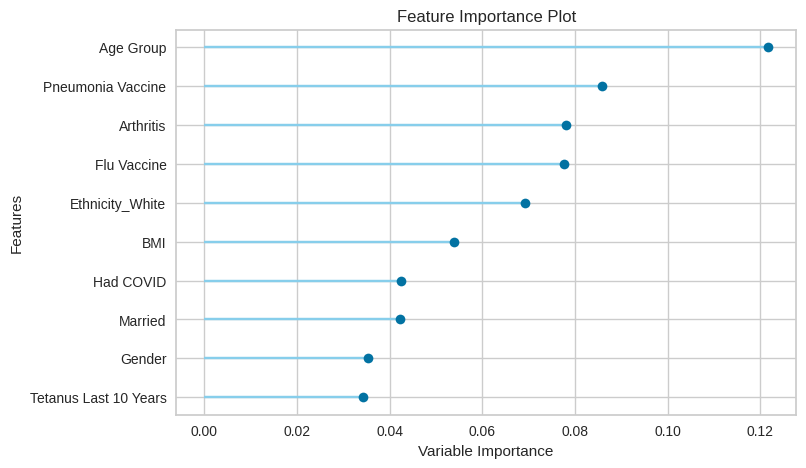

In [15]:
plot_model(best, plot='feature')

In [16]:
nb_best =create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5764,0.7035,0.7617,0.1871,0.3005,0.1345,0.2030
1,0.5626,0.7212,0.7936,0.1868,0.3024,0.1352,0.2108
2,0.5596,0.7199,0.7702,0.1822,0.2947,0.1258,0.1954
3,0.5642,0.6870,0.7149,0.1753,0.2815,0.1110,0.1678
4,0.5601,0.7030,0.7511,0.1795,0.2897,0.1200,0.1850
5,0.5656,0.7287,0.7719,0.1843,0.2976,0.1302,0.2006
6,0.5699,0.7026,0.7404,0.1814,0.2915,0.1232,0.1864
7,0.5722,0.7334,0.8191,0.1942,0.3139,0.1496,0.2321
8,0.5674,0.7057,0.7617,0.1838,0.2961,0.1283,0.1964


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
#plot_model(nb_best, plot='feature')

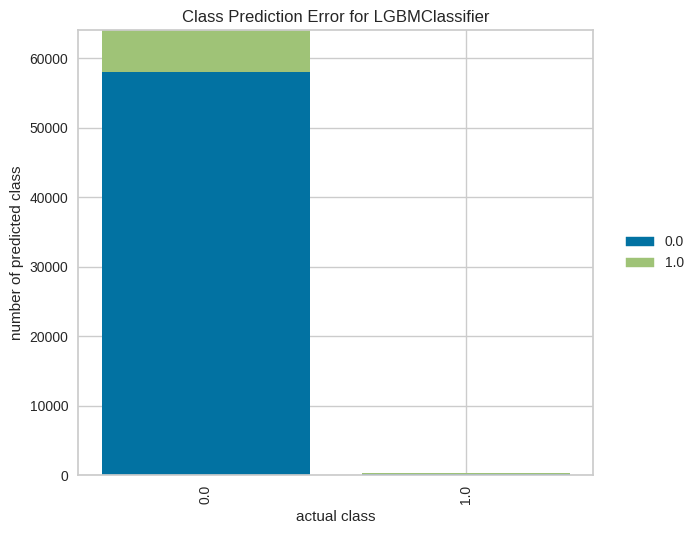

In [ ]:
plot_model(best, plot= 'error')

In [ ]:
#plot_model(best, plot= 'residual')

In [20]:
prd = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5181,0.6988,0.7904,0.1650,0.2729,0.1031,0.1748


In [ ]:
prd.head(10)

,Gender,Num of Bad Mental Health Days,Could Afford Doctor,Years Since Last Checkup,Exercise in Past 30 Days,Hours of Sleeping,Heart Attack,Heart Disease,Stroke,Asthma,...,Education_attended_college,Education_did_not_graduate_high_school,Education_graduated_college,Education_graduated_high_school,BMI Category_normal_weight,BMI Category_obese,BMI Category_over_weight,BMI Category_underweight,Cancer,prediction_label
16432,0,0.0,0.0,1.0,1.0,6.0,1.0,0.0,0.0,1.0,...,True,False,False,False,False,False,True,False,1.0,0.269699
109150,0,20.0,0.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,0.0,0.001242
1800,1,0.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,0.0,...,False,False,True,False,False,True,False,False,0.0,0.277847
26315,0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,...,False,False,True,False,True,False,False,False,0.0,0.024047
203164,0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,0.0,0.191700
41372,0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,1.0,...,False,False,False,True,False,True,False,False,0.0,0.025843
176673,0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,0.0,0.023863
41405,1,0.0,0.0,1.0,1.0,9.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,1.0,0.276422
64210,1,0.0,0.0,1.0,1.0,8.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,True,False,0.0,0.016521
202853,1,2.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,...,False,False,True,False,True,False,False,False,0.0,0.046959


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False
